In [59]:
# import 
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [60]:
# constant variables
COLOR = 'skyblue'
ROTATION = 15

# plt specifics
plt.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = (14, 6)

font = {'family': 'sans-serif', 
        'style': 'normal', 
        'weight': 'bold', 
        'size': 15}
plt.rc('font', **font)

In [61]:
# Define a function to parse the file
def parse_course_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    data = []
    for i in range(0, len(lines), 8):
        course_info = {}
        
        # Extract course name
        course_line = lines[i].strip()
        course_name_match = re.search(r'COURSE: (.+) F\d{4}', course_line)
        if course_name_match:
            course_info['Course Name'] = course_name_match.group(1)
        else:
            # Handle the case where the pattern does not match
            course_info['Course Name'] = None

        # Other extraction steps...

    return pd.DataFrame(data)

In [62]:
# get list of files in log directory
log_files = ["../logs/" + log for log in os.listdir(f"../logs") if "_raw_stats" in log]

In [63]:
print(log_files)

['../logs/F2023_raw_stats.txt', '../logs/S2023_raw_stats.txt']


In [64]:
# define df
stats_df = pd.DataFrame(columns=["Course Name", "Total", "Per Credit"])

# find classes and stats
for log_file in log_files:
    f = open(log_file, "r")

    # split f by lines that are empty
    lines = f.read().split("\n\n")

    for i in range(len(lines)):
        if i % 2 != 0 and lines[i] != "" and lines[i] != "\n" and lines[i] != " ": 
            analysis = lines[i].split("\n")
            course = analysis[0][analysis[0].index("("):].replace("(", "").replace(")", "").strip()
            total = float(analysis[1].split(":")[1].strip().split(" ")[0])
            try: 
                per_credit = float(analysis[3].split(" : ")[1].split(" ")[0])
            except:
                print("ERROR", analysis)
            stats_df.loc[len(stats_df)] = [course, total, per_credit]
        
# display sorted df by per credit
stats_df.sort_values(by=["Per Credit"], inplace=True, ascending=False)
display(stats_df)

,Course Name,Total,Per Credit
1,HNRS435A F2023,69.66,1.45
2,CSCI306 F2023,55.98,1.17
0,CSCI406 F2023,55.60,1.16
5,HNRS315 S2023,47.41,0.99
3,CSCI442 F2023,41.86,0.87
6,CHGN121 S2023,33.67,0.70
7,CSCI403 S2023,33.57,0.70
8,HASS327 S2023,33.79,0.70
4,CSCI341 S2023,29.20,0.61


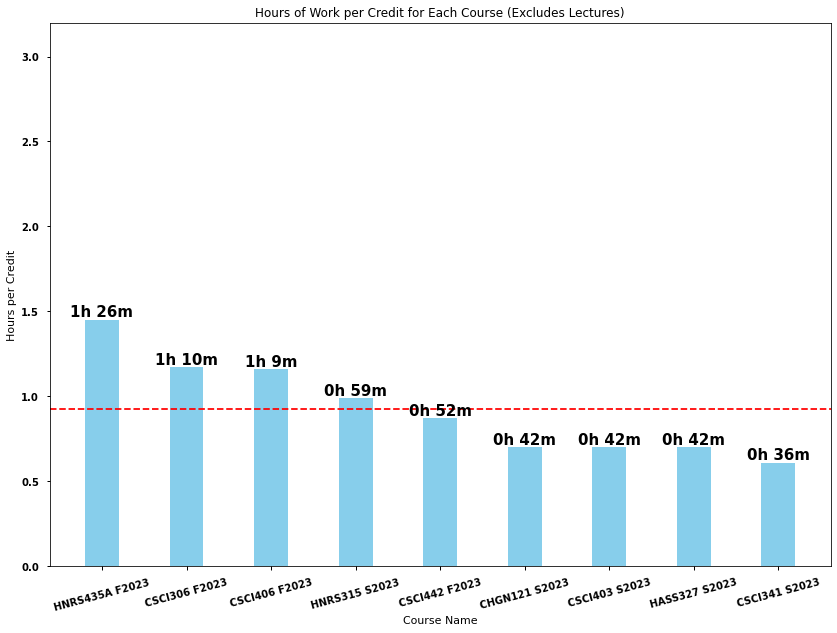

In [65]:
# create bar chart of stats_df sorted by per credit
plt.figure(figsize=(14, 10))
bars = plt.bar(stats_df["Course Name"], stats_df["Per Credit"], color=COLOR, width=0.4)

# plot line of average per credit
plt.axhline(y=stats_df["Per Credit"].mean(), color='r', linestyle='--')

plt.xticks(rotation=ROTATION)
plt.xlabel("Course Name")
plt.ylabel("Hours per Credit")
plt.ylim(0, 3.2)
plt.title("Hours of Work per Credit for Each Course (Excludes Lectures)")
for bar in bars:
        hours = int(bar.get_height())
        minutes = int((bar.get_height() - hours) * 60)
        label = f"{hours}h {minutes}m"
        plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(), label, ha='center', va='bottom')
plt.savefig(f"../images/hours_per_credit.png", transparent=False, format='png', dpi=300)
plt.show()


In [56]:
# save stats_df to csv
stats_df.to_csv("../data/hour_per_credit.csv", index=False)